# Motor position controller
In this section, the static motor controller will be created.

## External imports

In [1]:
import numpy as np
import pandas as pd
import csv
import os
import matplotlib
import matplotlib.pyplot as plt
import math
import torch

from torch.autograd import Variable
from sklearn.linear_model import LinearRegression
from matplotlib import cm
from matplotlib.ticker import LinearLocator

%matplotlib notebook

## Internal imports

In [2]:
from src import *

## Target trajectory

In [3]:
dt = 0.007
def sin_wave(amplitude: float, period: float):
    return amplitude * np.sin(np.linspace(-np.pi, np.pi, math.floor(period / dt)))

In [4]:
trajectory = np.zeros(1)
trajectory = np.concatenate((trajectory, 0. * np.ones(50)))
trajectory = np.concatenate((trajectory, 7. * np.ones(100)))
trajectory = np.concatenate((trajectory, 0. * np.ones(100)))
trajectory = np.concatenate((trajectory, -7. * np.ones(100)))
trajectory = np.concatenate((trajectory, 0. * np.ones(100)))
trajectory = np.concatenate((trajectory, 7. * np.ones(100)))
trajectory = np.concatenate((trajectory, 0. * np.ones(100)))
trajectory = np.concatenate((trajectory, -7. * np.ones(100)))
trajectory = np.concatenate((trajectory, 0. * np.ones(100)))
trajectory = np.concatenate((trajectory, 7. * np.ones(100)))
trajectory = np.concatenate((trajectory, 0. * np.ones(100)))
trajectory = np.concatenate((trajectory, -7. * np.ones(100)))
trajectory = np.concatenate((trajectory, 0. * np.ones(100)))
trajectory = np.concatenate((trajectory, 7. * np.ones(100)))
trajectory = np.concatenate((trajectory, 0. * np.ones(100)))
trajectory = np.concatenate((trajectory, -7. * np.ones(100)))
trajectory = np.concatenate((trajectory, 0. * np.ones(100)))

trajectory = np.concatenate((trajectory, sin_wave(20., 3.)))
trajectory = np.concatenate((trajectory, sin_wave(20., 2.5)))
trajectory = np.concatenate((trajectory, sin_wave(17., 2.)))
trajectory = np.concatenate((trajectory, sin_wave(15., 1.5)))
trajectory = np.concatenate((trajectory, sin_wave(8., 1.)))
trajectory = np.concatenate((trajectory, sin_wave(7., 1.)))
trajectory = np.concatenate((trajectory, sin_wave(6., 0.75)))
trajectory = np.concatenate((trajectory, sin_wave(5., 0.75)))

trajectory = np.concatenate((trajectory, 0. * np.ones(50)))

<IPython.core.display.Javascript object>


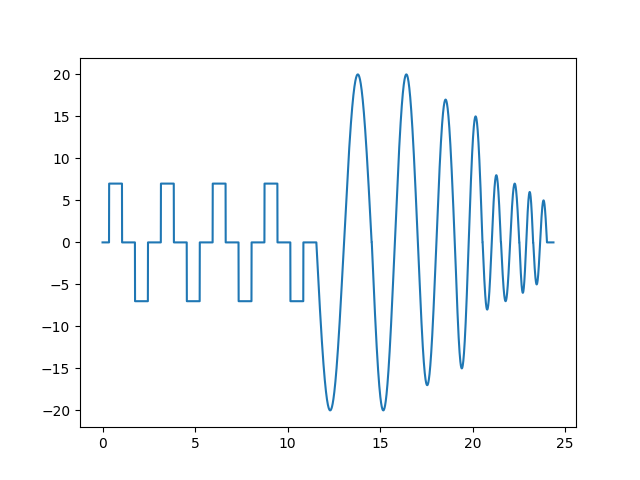

In [5]:
plt.plot(np.arange(0., len(trajectory) * dt, dt), trajectory)
plt.show()

## Controller

### Inputs
- error
- error²
- sign(error) * sqrt(error)
- d_error
- d_error²
- sign(d_error) * sqrt(d_error)
- integral_error
- integral_error²
- sign(integral_error) * sqrt(integral_error)

9 inputs
quadratic for better performance

### Output
- u

u: motor_input

### Architecture
FFW neural network [9, 9, 1]

## Training

In this section, the model template will be trained on the target trajectory.

### Optimisation

Genetic, survival of the fittest & matting + mutations.

Generation = 1
Fitness    = -3.7917875769037432
Generation = 2
Fitness    = -2.1026338248773198
Generation = 3
Fitness    = -1.4590398983881512
Generation = 4
Fitness    = -1.0362545691339116
Generation = 5
Fitness    = -1.0024072597205074
Generation = 6
Fitness    = -0.844785164391602
Generation = 7
Fitness    = -0.7938853501442626
Generation = 8
Fitness    = -0.7413595312910677
Generation = 9
Fitness    = -0.7095587034090572
Generation = 10
Fitness    = -0.6877023515151659
Generation = 11
Fitness    = -0.6658533416576011
Generation = 12
Fitness    = -0.6658533416576011
Generation = 13
Fitness    = -0.6109694783840726
Generation = 14
Fitness    = -0.6109694783840726
Generation = 15
Fitness    = -0.6014706786180163
Generation = 16
Fitness    = -0.5605404175965989
Generation = 17
Fitness    = -0.5477464742462639
Generation = 18
Fitness    = -0.5477464742462639
Generation = 19
Fitness    = -0.5477464742462639
Generation = 20
Fitness    = -0.5477464742462639


<IPython.core.display.Javascript object>


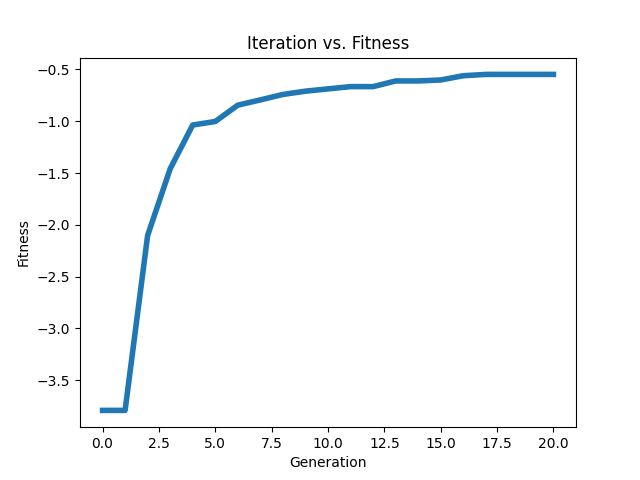

Fitness value of the best solution = -0.5477464742462639


In [6]:
controller = train_motor_controller(trajectory, 20, 20)

## Testing
In this section, the best controller will be evaluated on the train data and test data

In [7]:
trajectory_test = np.concatenate((trajectory, 0. * np.ones(400)))
trajectory_test = np.concatenate((trajectory_test, 15. * np.ones(400)))
trajectory_test = np.concatenate((trajectory_test, 0. * np.ones(400)))
trajectory_test = np.concatenate((trajectory_test, -20. * np.ones(400)))
trajectory_test = np.concatenate((trajectory_test, 0. * np.ones(400)))

trajectory_test = np.concatenate((trajectory_test, sin_wave(40., 10)))
trajectory_test = np.concatenate((trajectory_test, sin_wave(40., 5)))
trajectory_test = np.concatenate((trajectory_test, sin_wave(30., 2)))
trajectory_test = np.concatenate((trajectory_test, sin_wave(20., 1)))
trajectory_test = np.concatenate((trajectory_test, sin_wave(10., 0.75)))
trajectory_test = np.concatenate((trajectory_test, sin_wave(10., 0.75)))
trajectory_test = np.concatenate((trajectory_test, sin_wave(30., 2)))

In [8]:
evaluator: ModelEvaluator = ModelEvaluator(trajectory_test)
history, error, u, loss = evaluator.simulate(controller)

<IPython.core.display.Javascript object>


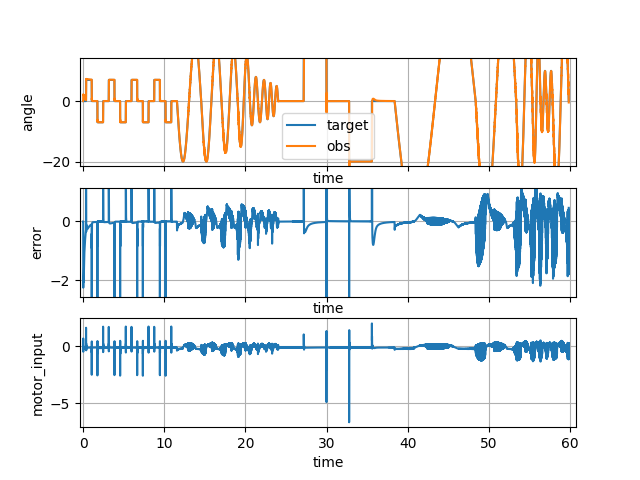

In [9]:
x = np.arange(0., len(trajectory_test) * dt, dt)

fig, axs = plt.subplots(3, 1, sharex=True)
axs[0].plot(x, trajectory_test, label='target')
axs[0].plot(x, history, label='obs')
axs[0].set_xlabel('time')
axs[0].set_ylabel('angle')
axs[0].grid(True)
axs[0].legend()

axs[1].plot(x, error)
axs[1].set_xlabel('time')
axs[1].set_ylabel('error')
axs[1].grid(True)

axs[2].plot(x, u)
axs[2].set_xlabel('time')
axs[2].set_ylabel('motor_input')
axs[2].grid(True)
